# Siparişler - `review_score` Çok Değişkenli Regresyonu

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ Devam etmeden önce:
* 💾 Önceki ünitenin Siparişler çözümünü indirin
* 👥 `order_solution.py`'nin içeriğini `olist/order.py` dosyasına kopyalayıp yapıştırın

⚠️ `olist` havuzunuzda `order.py` dosyasındaki kod değişikliklerini commit etmeyi unutmayın!

👇 Öncelikle `orders` veri setini içeri aktarın

In [3]:
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

Önceki analizimizi hatırlayalım:

Aşağıdaki 👇 korelasyon matrisi üzerinden, `review_score`'un çoğunlukla iki özellik ile ilişkili olduğunu görebiliriz: `wait_time` ve `delay_vs_expected`. Ancak, bu iki özellik de birbirleriyle yüksek oranda ilişkilidirler.

Bu alıştırmada, bir özelliğin etkisini ayırt etmek için `statsmodels` kullanacağız, **diğer özellikleri sabit tutarak**.

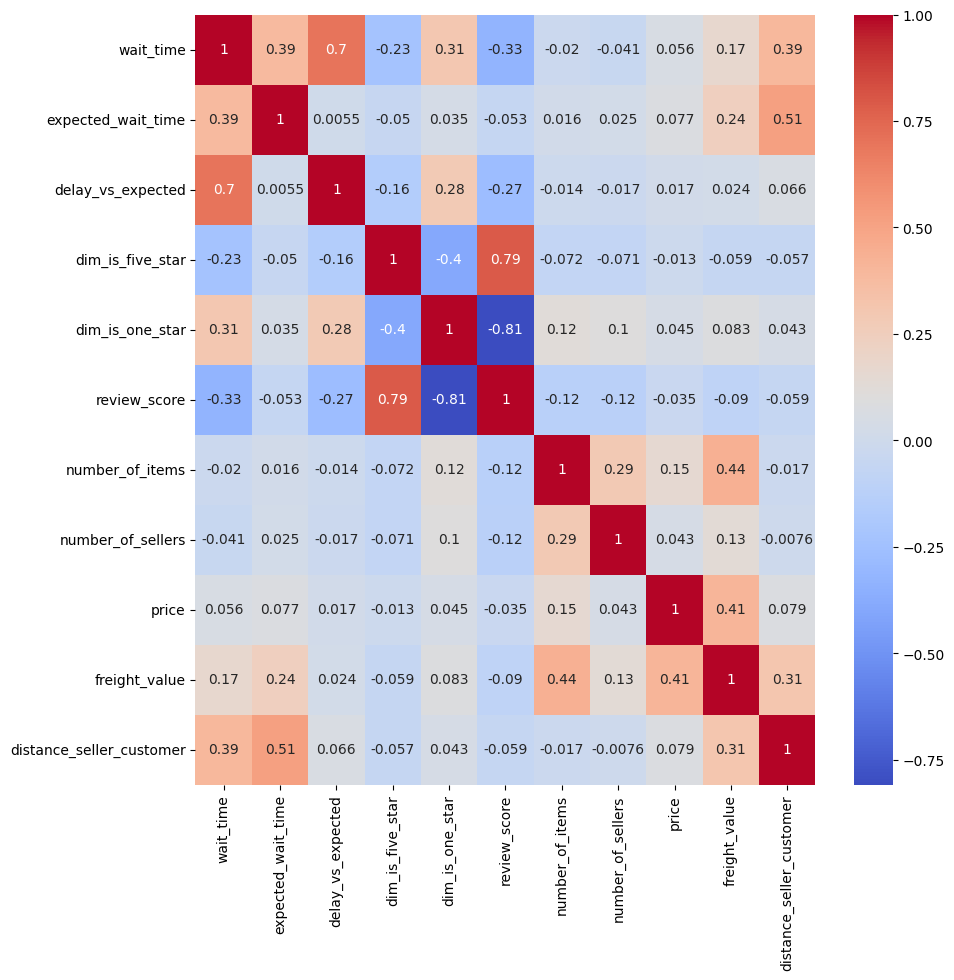

In [4]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders.corr(numeric_only=True),
    cmap='coolwarm',
    annot=True,
    annot_kws={"size": 10}
);

## 1 - Tek Değişkenli Regresyon

❓ [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) ile `statsmodels.formula.api` kullanarak hızlı bir şekilde şunları oluşturun:
 - `model1`: `review_score`'un `wait_time` üzerinde ols regresyonu
 - `model2`: `review_score`'un `delay_vs_expected` üzerinde ols regresyonu

Her biri için `summary` tablosunu yazdırın ve sonuçları yorumlayin:
- Bu sonuçların seaborn regplot sonuçları ile nasıl eşleştiğini anladığınızdan emin olun
- Regresyon performans metriği `R-squared`, `individual regression coefficients`, `t-values`, `p-values` ve `95% confidence intervals`'ı okuyun

***Model 1***:

In [6]:
import statsmodels.formula.api as smf
model1 = smf.ols(
    formula="review_score ~ wait_time",
    data=orders
).fit()

In [7]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        07:38:38   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7236      0.006    727.904      0.000       4.711       4.736
wait_time     -0.0454      0.000   -109.730      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19552.934   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35454.407
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.453   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Model 2***:

In [16]:
model2 = smf.ols(
    formula ="review_score ~ delay_vs_expected",
    data = orders
).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        07:46:03   Log-Likelihood:            -1.5639e+05
No. Observations:               95872   AIC:                         3.128e+05
Df Residuals:                   95870   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2121      0.004   1041.192      0.000       4.204       4.220
delay_vs_expected    -0.0752      0.001    -87.644      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20662.535   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49770.507
Skew:                          -1.203   Prob(JB):                         0.00
Kurtosis:                       5.582   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Çok Değişkenli Regresyon

❓ Siparişe bir gün `delay_vs_expected` eklemenin `review_score` üzerindeki etkisi nedir, **`wait_time` sabit tutarak**? İki özellikten hangisi düşük `review_score` için en açıklayıcıdır?

Bu amaçla, `wait_time` ve `delay_vs_expected`'in özellikler (bağımsız değişkenler) olduğu ve `review_score`'un hedef (bağımlı değişken) olduğu bir OLS modeli `model3`'ü çalıştırın

***Model 3***:

In [17]:
model3 = smf.ols(
    formula="review_score ~ wait_time + delay_vs_expected",
    data=orders
).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        07:48:39   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6502      0.008    601.568      0.000       4.635       4.665
wait_time            -0.0383      0.001    -65.969      0.000      -0.039      -0.037
delay_vs_expected    -0.0205      0.001    -17.417      0.000      -0.023      -0.018
==============================================================================
Omnibus:                    19995.754   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40513.333
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.976   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
👉 Çok değişkenli regresyon, bir özelliğin etkisini izole etmek ve diğer özelliklerin etkisini kontrol etmek için bize izin verir. Bu yeni katsayılara **`kısmi korelasyon katsayıları`** denir. 

❓ Yukarıda *seaborn* ile hesaplanan **basit regresyon** katsayıları ile fark görebilir misiniz? 

❓ `wait_time` ve `delay_vs_expected` için göreceli eğimler hakkında ne söyleyebilirsiniz?

<details>
    <summary>- 💡 Solution 💡-</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0205 [0.023 - 0.018] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0383 [0.039 - 0.037] points

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❌ R-squared oldukça düşük: review_score varyasyonlarının en fazla %12'si `wait_time` ve `delay_vs_expected`'in birleşik varyasyonları tarafından açıklanır.

✅ Doğrusal regresyonun açıklanabilirliğini iyileştirmek için regresyonumuza daha fazla özellik eklemeyi deneyelim.

Sonraki adımlarda `orders` veri setinden daha fazla özellik içeren yeni bir OLS `model4` oluşturacağız. Adım adım size rehberlik edeceğiz.

📝 <u>Not</u>: bir **`Çok Değişkenli Doğrusal Regresyon`** aynı zamanda **`Ordinary Least Squares`** yöntemi olarak da adlandırılır çünkü bu modelde **`MSE Ortalama Kare Hatalar`**'ı minimize etmek istiyoruz

***Model 4***:

❓ Hangi özellikleri göz önünde almak istersiniz?

👉 Bu özelliklerle bir `features` DataFrame oluşturun.

- ⚠️ **veri sızıntısı** oluşturmayın: `review_score`'tan doğrudan türetilen özellikleri eklemeyin
- ⚠️ Birbirleriyle mükemmel bir şekilde ilişkili olan iki özellik eklemeyin

In [20]:
features = orders[
    ['wait_time', 'price', 'distance_seller_customer', 'freight_value']
]

Sonra, özellikleri "standardize" edeceğiz.

**Bu ne anlama gelir?**

⚖️  Her özellik $X_i$'yi ilgili z-score'una $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ dönüştüreceğiz.

**Neden?**

Bir `çok değişkenli doğrusal regresyon`'da, her özelliğin hedef üzerindeki etkisini ölçmeye çalışıyoruz.
    
⚠️ Ölçek etkileri nedeniyle, bazı özellikler yanlışlıkla diğerlerinden daha önemli olarak görülecektir
    
> Örneğin: "yatak odası sayısı" özelliği 1 ile 5 arasında ve "yüzey" özelliği 20 ile 200 m² arasında ise, bu iki özelliğin aralıkları oldukça farklıdır...

Bu nedenle kısmi regresyon katsayıları $\beta_i$'yi birlikte karşılaştırabilmek için standardize ederiz. Aksi takdirde, $\beta_i$ aynı boyuta sahip olmayacak, yani elmalar (örn. "gün başına review-yıldızlar") ile portakalları (örn. "BRL başına review-yıldızlar") karşılaştırmış olacaksınız!

📅 Makine Öğrenmesi Algoritmalarını keşfettiğimizde, herhangi bir hedefi tahmin etmeye çalışmadan önce bazı ölçekleme işlemleri gerçekleştirmemiz gerekecektir.

👉  Özelliklerinizi standardize edin:

1. `features` DataFrame'inizden başlayın
1. `mean`'i çıkarın
1. Standart sapma `std`'ye bölün.
1. Sonucu `orders_standardized` değişkenine kaydedin.
1. Son olarak, `orders['review_score']` sütununu `orders_standardized`'e kopyalayın.

2. ve 3. adımları basit bir matematiksel işlem olarak yazabilirsiniz, hatta DataFrames ile de. Pandas bunu anlamak için yeterince akıllıdır.

<details>
  <summary><i>İpucu</i></summary>

  ```python
  features - features.mean() / features.std()
  ```

</details>

👉 `model4`'ü oluşturun ve eğitin.

In [25]:
orders_standardized = (features - features.mean()) / features.std() #zscore ile standartlaştırma
orders_standardized['review_score'] = orders['review_score']
orders_standardized.head()




,wait_time,price,distance_seller_customer,freight_value,review_score
0,-0.431192,-0.513802,-0.979475,-0.652038,4
1,0.134174,-0.086640,0.429743,0.000467,4
2,-0.329907,0.111748,-0.145495,-0.164053,5
3,0.073540,-0.441525,2.054621,0.206815,5
4,-1.019535,-0.562388,-0.959115,-0.652038,5


In [26]:
model4_std = smf.ols(
    formula="review_score ~ wait_time + price + distance_seller_customer + freight_value",
    data=orders_standardized
).fit()

model4_std.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     3308.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        08:02:45   Log-Likelihood:            -1.5389e+05
No. Observations:               95872   AIC:                         3.078e+05
Df Residuals:                   95867   BIC:                         3.078e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.1555      0.004   1068.068      0.000       4.148       4.163
wait_time                   -0.4690      0.004   -110.609      0.000      -0.477      -0.461
price                        0.0044      0.004      1.021      0.307      -0.004       0.013
distance_seller_customer     0.1344      0.004     30.479      0.000       0.126       0.143
freight_value               -0.0812      0.004    -18.091      0.000      -0.090      -0.072
==============================================================================
Omnibus:                    19322.518   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35804.354
Skew:                          -1.265   Prob(JB):                         0.00
Kurtosis:                       4.601   Cond. No.                         1.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
❓ En önemli özellikler nelerdir? (onları iyi görselleştirmek için `.plot(kind='barh')` ile bir çubuk grafik yapın)
- Genel regresyon performansı nasıl değişti?
- Bu regresyon istatistiksel olarak anlamlı mıdır?

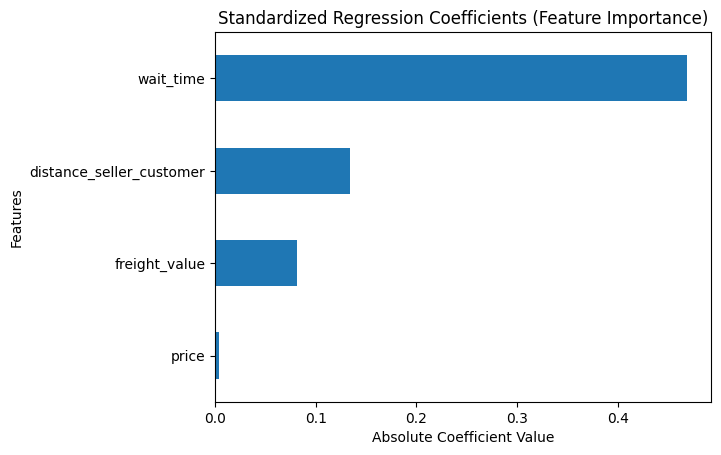

In [27]:
import matplotlib.pyplot as plt

# Intercept hariç katsayılar
coefs = model4_std.params.drop("Intercept")

# Mutlak değere göre sırala (önem)
coefs_sorted = coefs.abs().sort_values()

# Çubuk grafik
coefs_sorted.plot(kind="barh")
plt.title("Standardized Regression Coefficients (Feature Importance)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.show()


<details>
    <summary>- 💡 Açıklamalar 💡 -</summary>
    

- `wait_time` en büyük açıklayıcı değişkendir
- Tek bir sipariş için ne kadar çok `items` ve `sellers` varsa, `review_score` o kadar düşük görünür
- Mesafe de müşteri memnuniyetinde rol oynar.
- Özellik seçiminize bağlı olarak, `price` ve `freight_value` hakkında p-değerleri çok yüksekse hiçbir sonuca varamayabilirsiniz
    
- Genel olarak, bu çok değişkenli regresyon, F-istatistiği 1'den çok daha büyük olduğu için istatistiksel olarak anlamlı kalır (en az bir özelliğin çok düşük p-değeri vardır)

- R-squared çok fazla artmadı. `review_score`'un açıklanabilirliğinin çoğu orders veri seti dışında yer alır.

⚠️ Gözlem sayısı (n) özellik sayısından (p) çok daha yüksek olduğunda düşük R-squared yaygındır. Böyle regresyonlardan, istatistiksel olarak anlamlı olması koşuluyla yine de ilgili içgörüler elde edilebilir.
</details>



## 3 - Model Performansını Kontrol Edin

⚠️ Regresyon performansı sadece R-squared'i ile ölçülmemelidir!

👀 Her zaman tahminlerin dağılımını, özellikle de kalıntıları görselleştirin.

❓ Kalıntıları hesaplayın.

Kalıntıların ortalamasının 0'a eşit olduğunu görmelisiniz (doğrusal regresyon yapılırken bunu her zaman doğrulayın)

In [30]:
# Gerçek ve tahmin edilen değerler
y_true = orders_standardized["review_score"]
y_pred = model4_std.predict(orders_standardized)

# Kalıntılar
residuals = y_true - y_pred
residuals.mean()


np.float64(1.960158782061825e-15)

🧮 İlişkili RMSE'yi hesaplayın.

In [31]:
import numpy as np

rmse = np.sqrt(np.mean(residuals ** 2))
rmse

np.float64(1.2046476490736455)

📊 `residuals`'ı bir histogramda çizin.

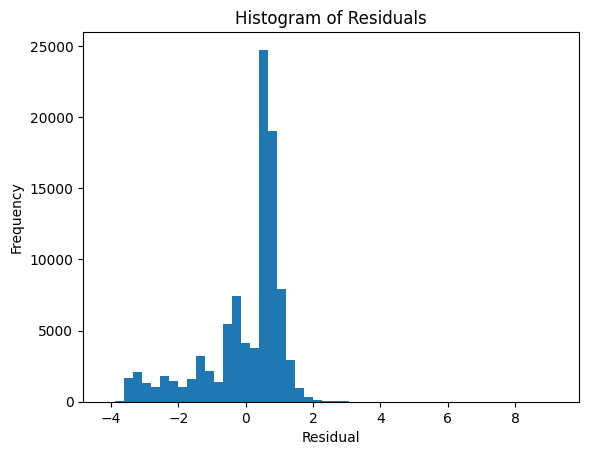

In [33]:
import matplotlib.pyplot as plt

residuals.plot(kind="hist", bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


❓ Kalıntıların distplot'unun neden bu kadar garip bir şekle sahip olduğunu tahmin edebilir misiniz?

*İpucu:*<br/>
👉 Aynı grafik üzerinde hem `review_score`'un dağılımını hem de `predicted_review_score`'un dağılımını çizin.

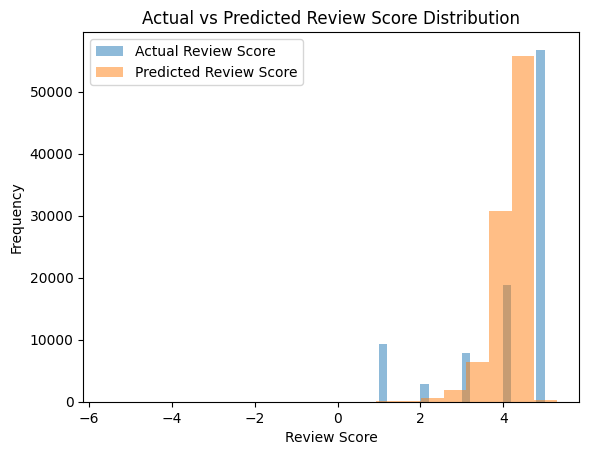

In [34]:
orders_standardized["review_score"].plot(
    kind="hist",
    bins=20,
    alpha=0.5,
    label="Actual Review Score"
)

y_pred.plot(
    kind="hist",
    bins=20,
    alpha=0.5,
    label="Predicted Review Score"
)

plt.legend()
plt.title("Actual vs Predicted Review Score Distribution")
plt.xlabel("Review Score")
plt.show()


📈 Aslında, önceki zorlukta `review_score`'un `delay_vs_expected`'e karşı `regresyon çizgisi`'ni zaten çizmiştik.

Bu çizimi yeniden görselleştirmek için aşağıdaki hücreyi çalıştırın:

(0.0, 5.942380063547169)

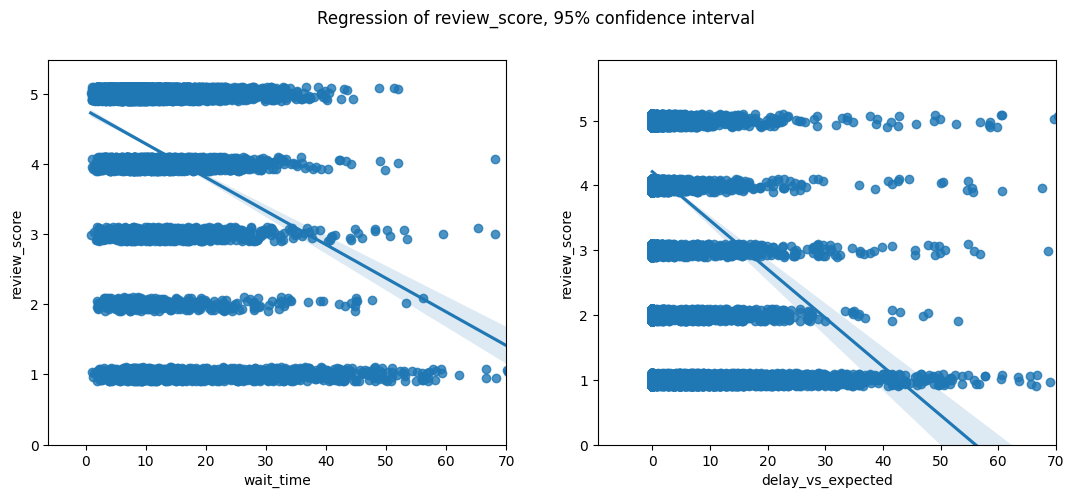

In [35]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

☝️ Bir siparişin `review_score`'unu onun `wait_time` veya `delay_vs_expected`'ine karşı regrese etmenin zor olduğunu görebilirsiniz çünkü `review_score` ayrı bir sayı olup aynı zamanda bir kategori olarak da yorumlanabilir: 1 (çok kötü), 2 (kötü), 3 (orta), 4 (iyi), 5 (mükemmel).

📅 Sonraki ünitede, adına rağmen bir `Classification Algorithm` olan yeni bir model keşfedeceksiniz: `Logistic Regression` 

☝️ Sonuç olarak, modelimiz iki nedenden dolayı o kadar harika değil:
- İlk olarak, review_scores'un önemli bir kısmını açıklamak için yeterli özelliğimiz olmadığı için (düşük R-squared)
- İkinci olarak, "doğrusal regresyon" işlevini ayrı bir sınıflandırma problemine uydurmaya çalıştığımız için

💡 Bireysel siparişler üzerinde çalışmak ve `wait_time` tabanlı ayrı `review_score`'ları açıklamaya çalışmak yerine, bir sonraki zorlukta siparişleri satıcılar tarafından toplayarak analiz edilmesini satıcı seviyesine yoğunlaştıracağız.

🏁 Harika iş!

💾 İşiniz bittiğinde bu not defterini *kaydetmeyi*, *commit* ve *push* etmeyi unutmayın!